In [1]:
from pathlib import Path
import os
os.chdir("..")

In [2]:
import torch

from fssweed.data.phenobench import PhenoBenchTestDataset
from fssweed.data import get_preprocessing
from fssweed.utils.segmentation import create_rgb_segmentation, unnormalize
from torchvision.transforms.functional import resize

import lovely_tensors as lt
lt.monkey_patch()

In [3]:
parameters = {
    'dataloader': {'num_workers': 0}, 
    'dataset': {
        'preprocess': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225], 'image_size': 384},
        'datasets': {
            'test_weedmap': {
                'train_root': '../Datasets/WeedMap/0_rotations_processed_003_test/RedEdge/000',
                'test_root': '../Datasets/WeedMap/0_rotations_processed_003_test/RedEdge/003',
                'prompt_images': [
                    # 'frame0009_2.png',
                    'frame0021_2.png',
                    'frame0033_3.png',
                    'frame0034_1.png',
                    'frame0048_0.png',
                    ],
                'remove_black_images': False}
            },
    },
    'model': {
        'name': 'dcama',
        'backbone': 'swin',
        'backbone_checkpoint': 'checkpoints/swin_base_patch4_window12_384.pth',
        'model_checkpoint': 'checkpoints/swin_fold0_pascal_modcross_soft.pt',
        # 'model_checkpoint': "checkpoints/swin_fold0.pt",
        'concat_support': False,
        'image_size': 384,
        'train_backbone': True
        }, 
    'refinement': {'lr': 0.01, 'max_iterations': 1000}
}

In [4]:
preprocess = get_preprocessing(parameters["dataset"])

In [6]:
dataset = PhenoBenchTestDataset("../Datasets/PhenoBench", prompt_images=[0, 1, 2], preprocess=preprocess)

In [11]:
selected = torch.randperm(len(dataset.train_data))[:10].tolist()

In [12]:
prompts = dataset.extract_prompts(prompt_images=selected)

In [13]:
shape = (256, 256)

masks = create_rgb_segmentation(prompts["prompt_masks"])
images = unnormalize(prompts["images"])

images = resize(images, shape)
masks = resize(masks, shape)

167


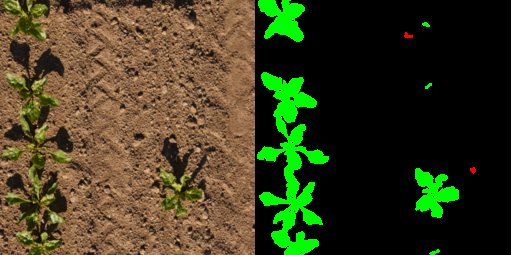

1067


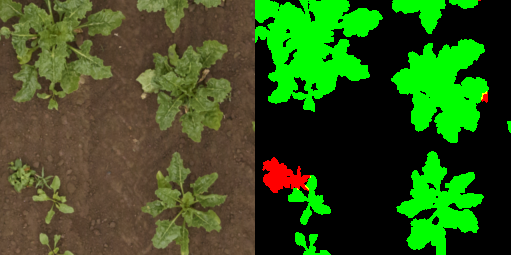

1110


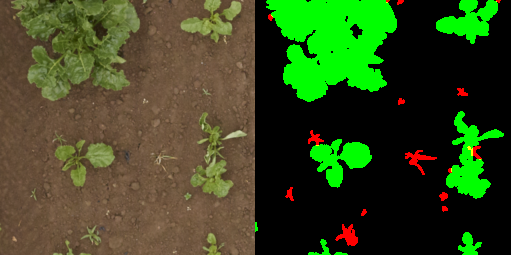

1272


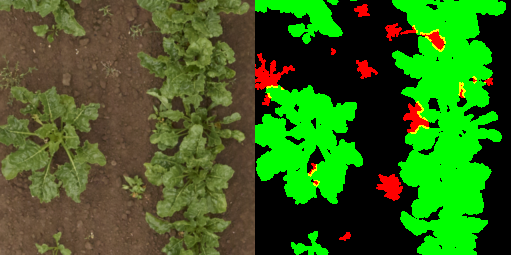

442


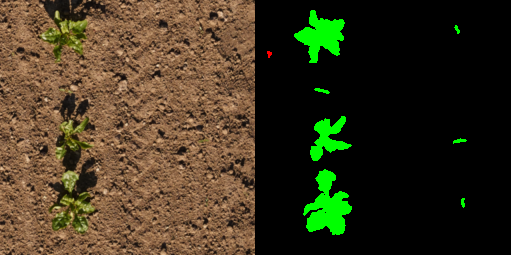

146


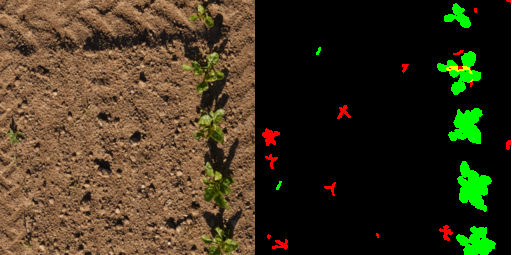

879


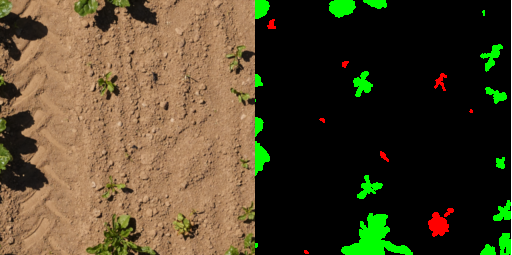

1145


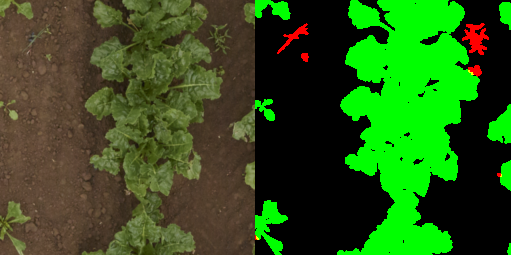

56


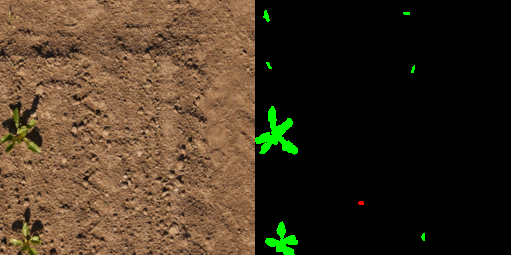

446


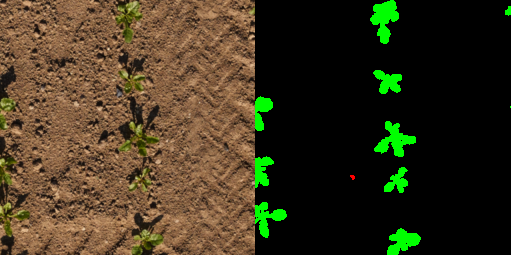

In [15]:
for i, sample in zip(selected, torch.cat([images, masks], dim=3)):
    print(i)
    display(sample.rgb)

In [12]:
dataset.extract_prompts()["prompt_masks"]

tensor[7, 3, 1024, 1024] n=22020096 (84Mb) x∈[0., 1.000] μ=0.012 σ=0.109